# 📦 Import Libraries

In [24]:
import os
import joblib

In [25]:
import numpy as np
import pandas as pd

In [26]:
import matplotlib.pyplot as plt

In [27]:
from lazypredict.Supervised import LazyRegressor

In [28]:
from utils.data_acquisition import *
from utils.data_preprocessing import *

In [29]:
plot_size = (12, 6)

graph_colors = {
  "black": "#1F1E1F",
  "blue": "#03A9CE",
}

text_colors = {
  "title": "#262626",
  "subtitle": "#646464",
}

fig_path = "./figures/"

if not os.path.exists(fig_path):
    os.makedirs(fig_path)

# 💾 Data Acquisition

In [30]:
DATA_PATH = "./data/"

GASOLINE_DATA_PATH_1 = DATA_PATH + "[Gasolina] Trajeto Casa-Escola-UFRN/"
GASOLINE_DATA_PATH_2 = DATA_PATH + "[Gasolina2023] Trajeto Casa-Escola-UFRN/"
ETHANOL_DATA_PATH = DATA_PATH + "[Etanol] Trajeto Casa-Escola-UFRN/"

GASOLINE_DATA_PATHS_1 = get_list_paths(GASOLINE_DATA_PATH_1)
GASOLINE_DATA_PATHS_2 = get_list_paths(GASOLINE_DATA_PATH_2)

GASOLINE_DATA_PATHS = GASOLINE_DATA_PATHS_1 + GASOLINE_DATA_PATHS_2

ETHANOL_DATA_PATHS = get_list_paths(ETHANOL_DATA_PATH)

SELECTED_COLUMNS = [
  "DeviceTime",
  "Latitude",
  "Longitude",
  "Speed(OBD)(km/h)",
  "AirFuelRatio(Commanded)(:1)",
  "Acceleration"
]

In [31]:
all_data_gasoline = read_all_data(GASOLINE_DATA_PATHS)
all_data_ethanol = read_all_data(ETHANOL_DATA_PATHS)

# 🧩 Data Modelling

In [32]:
for data in all_data_gasoline:
    data = remove_space_in_columns(data)
    data["Acceleration"] = compute_acceleration(data)

all_data_gasoline = concatenate_dataframes(all_data_gasoline)
all_data_gasoline = filter_columns(all_data_gasoline, SELECTED_COLUMNS)

all_data_gasoline.drop(columns=["DeviceTime"], inplace=True)

In [33]:
for data in all_data_ethanol:
    data = remove_space_in_columns(data)
    data["Acceleration"] = compute_acceleration(data)

all_data_ethanol = concatenate_dataframes(all_data_ethanol)
all_data_ethanol = filter_columns(all_data_ethanol, SELECTED_COLUMNS)

all_data_ethanol.drop(columns=["DeviceTime"], inplace=True)

In [34]:
X_train_gasoline, X_test_gasoline, y_train_gasoline, y_test_gasoline = split_data(
    all_data_gasoline.drop(columns=["AirFuelRatio(Commanded)(:1)"]),
    all_data_gasoline["AirFuelRatio(Commanded)(:1)"]
)

X_train_ethanol, X_test_ethanol, y_train_ethanol, y_test_ethanol = split_data(
    all_data_ethanol.drop(columns=["AirFuelRatio(Commanded)(:1)"]),
    all_data_ethanol["AirFuelRatio(Commanded)(:1)"]
)

# 🔎 Exploratory Data Analysis (EDA)

## Gasoline

In [35]:
all_data_gasoline.shape

(112964, 5)

## Ethanol

In [36]:
all_data_ethanol.shape

(40291, 5)

# 🤖 Model Training

## Gasoline

In [37]:
lr_gasoline_afr = LazyRegressor(
    verbose=0,
    ignore_warnings=False,
    custom_metric=None,
    random_state=42
)

In [38]:
models_gasoline_afr, predictions_gasoline_afr = lr_gasoline_afr.fit(
    X_train_gasoline.values,
    X_test_gasoline.values,
    y_train_gasoline.values,
    y_test_gasoline.values
)

 21%|██▏       | 9/42 [00:15<01:05,  1.97s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 60.8 GiB for an array with shape (90371, 90371) and data type float64


 45%|████▌     | 19/42 [00:27<00:16,  1.40it/s]

KernelRidge model failed to execute
Unable to allocate 60.8 GiB for an array with shape (90371, 90371) and data type float64


 79%|███████▊  | 33/42 [1:08:35<37:05, 247.29s/it]  

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [1:15:21<00:00, 107.66s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 631
[LightGBM] [Info] Number of data points in the train set: 90371, number of used features: 4
[LightGBM] [Info] Start training from score 15.654497


In [39]:
models_gasoline_afr

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.39,0.39,2.86,0.17
HistGradientBoostingRegressor,0.38,0.38,2.87,0.48
XGBRegressor,0.37,0.37,2.89,0.18
GradientBoostingRegressor,0.32,0.32,3.01,10.70
RandomForestRegressor,0.31,0.31,3.02,34.01
MLPRegressor,0.30,0.30,3.06,42.47
KNeighborsRegressor,0.26,0.26,3.13,0.26
BaggingRegressor,0.26,0.26,3.13,3.53
ExtraTreesRegressor,0.22,0.22,3.23,8.83


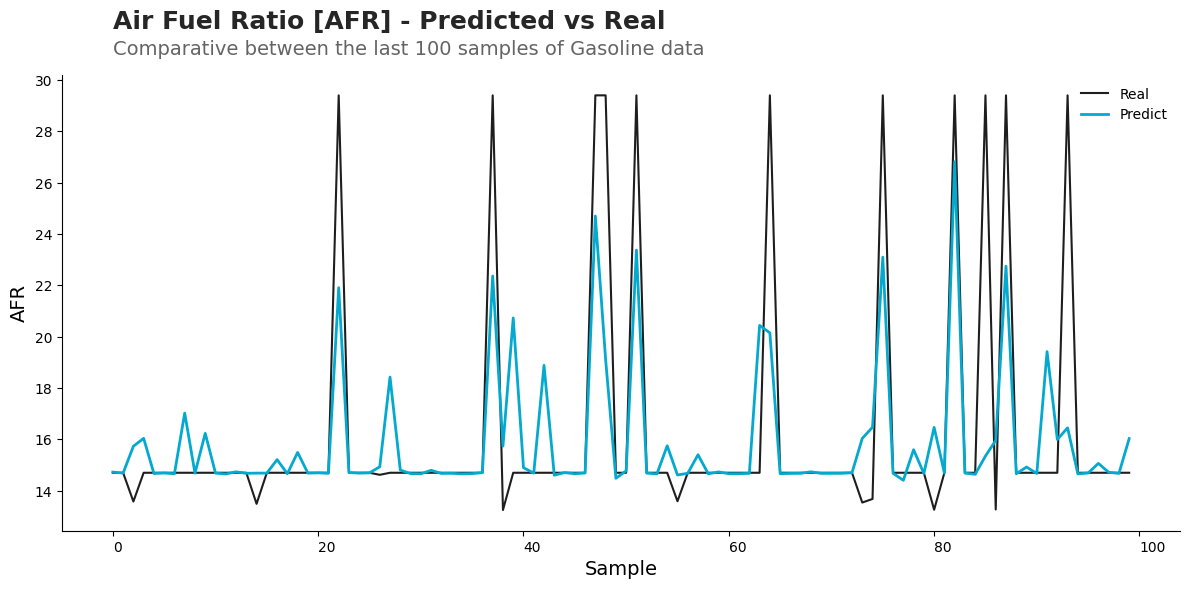

In [40]:
fig, ax = plt.subplots(figsize=plot_size)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("AFR", fontsize=14)
ax.set_xlabel("Sample", fontsize=14)

plt.xticks(rotation=0, ha="left")

y_pred = lr_gasoline_afr.models["LGBMRegressor"].predict(X_test_gasoline)

ax.plot(list(range(100)), y_test_gasoline[-100:], label="Real", color=graph_colors["black"])
ax.plot(list(range(100)), y_pred[-100:], label="Predict", color=graph_colors["blue"], linewidth=2)

plt.text(0, 32, "Air Fuel Ratio [AFR] - Predicted vs Real", fontsize=18, color=text_colors["title"], weight="bold")
plt.text(0, 31, "Comparative between the last 100 samples of Gasoline data", fontsize=14, color=text_colors["subtitle"])

ax.legend(loc="upper right").set_frame_on(False)

plt.tight_layout()
plt.savefig(f"{fig_path}gasoline_afr.png")
plt.show()

## Ethanol

In [41]:
lr_ethanol_afr = LazyRegressor(
    verbose=0,
    ignore_warnings=False,
    custom_metric=None,
    random_state=42
)

In [42]:
models_ethanol_afr, predictions_ethanol_afr = lr_ethanol_afr.fit(
    X_train_ethanol.values,
    X_test_ethanol.values,
    y_train_ethanol.values,
    y_test_ethanol.values
)

  0%|          | 0/42 [00:00<?, ?it/s]

 26%|██▌       | 11/42 [00:19<01:31,  2.97s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 3.87 GiB for an array with shape (519434796,) and data type float64


 79%|███████▊  | 33/42 [07:58<02:52, 19.13s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [08:22<00:00, 11.96s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 32232, number of used features: 4
[LightGBM] [Info] Start training from score 15.583214


In [43]:
models_ethanol_afr

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.40,0.40,2.90,0.32
LGBMRegressor,0.40,0.40,2.90,0.11
XGBRegressor,0.38,0.38,2.93,0.13
RandomForestRegressor,0.37,0.37,2.97,10.21
GradientBoostingRegressor,0.33,0.33,3.06,3.74
BaggingRegressor,0.32,0.32,3.07,1.01
MLPRegressor,0.31,0.31,3.11,17.57
KNeighborsRegressor,0.31,0.31,3.11,0.08
ExtraTreesRegressor,0.29,0.29,3.14,2.98


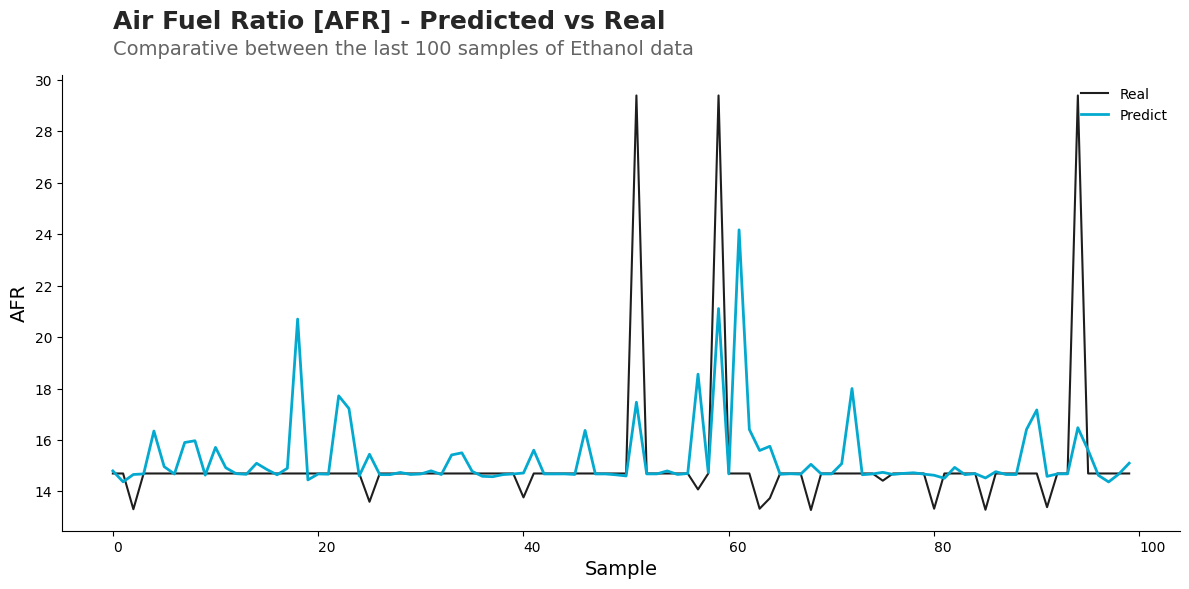

In [44]:
fig, ax = plt.subplots(figsize=plot_size)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("AFR", fontsize=14)
ax.set_xlabel("Sample", fontsize=14)

plt.xticks(rotation=0, ha="left")

y_pred = lr_ethanol_afr.models["LGBMRegressor"].predict(X_test_ethanol)

ax.plot(list(range(100)), y_test_ethanol[-100:], label="Real", color=graph_colors["black"])
ax.plot(list(range(100)), y_pred[-100:], label="Predict", color=graph_colors["blue"], linewidth=2)

plt.text(0, 32, "Air Fuel Ratio [AFR] - Predicted vs Real", fontsize=18, color=text_colors["title"], weight="bold")
plt.text(0, 31, "Comparative between the last 100 samples of Ethanol data", fontsize=14, color=text_colors["subtitle"])

ax.legend(loc="upper right").set_frame_on(False)

plt.tight_layout()
plt.savefig(f"{fig_path}ethanol_afr.png")
plt.show()

# 💾 Save Model

In [45]:
joblib.dump(lr_gasoline_afr.models["LGBMRegressor"], "./models/LGBMRegressor_gasoline_afr.pkl")

['./models/LGBMRegressor_gasoline_afr.pkl']

In [46]:
joblib.dump(lr_ethanol_afr.models["LGBMRegressor"], "./models/LGBMRegressor_ethanol_afr.pkl")

['./models/LGBMRegressor_ethanol_afr.pkl']